### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



- En este paso, iteraremos sobre las ***tiendas*** para sumar la columna `precio` y poder calcular la facturacion

La facturacion de tienda1 es de 1150880400.0
La facturacion de tienda2 es de 1116343500.0
La facturacion de tienda3 es de 1098019600.0
La facturacion de tienda4 es de 1038375700.0


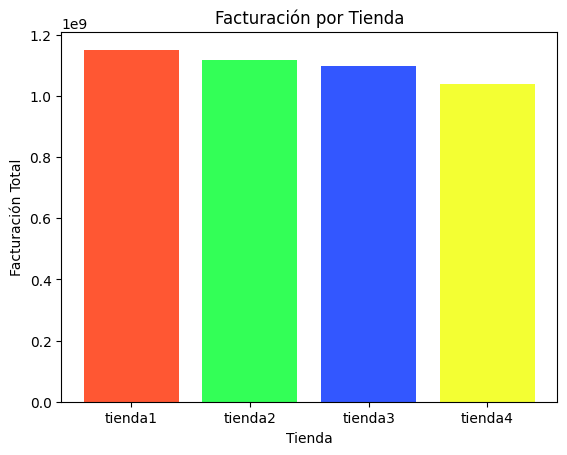

In [2]:
tiendas = [tienda1, tienda2, tienda3, tienda4]
tiendas_string = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
facturacion = []

for i,tienda in enumerate(tiendas):
    total = tienda['Precio'].sum()
    facturacion.append(total)
    print(f'La facturacion de tienda{i+1} es de {total}')

fig, ax = plt.subplots()
ax.bar(tiendas_string, facturacion, color=['#FF5733', '#33FF57', '#3357FF', '#F3FF33'])
plt.title('Facturación por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación Total')

plt.show()

# 2. Ventas por categoría

- En esta ocasion, agruparemos por cantidad de productos vendidos, basandonos en su **categoria**

In [3]:
cat_cant =tienda1["Categoría del Producto"].value_counts().reset_index().rename(columns={'Categoría del Producto': 'Categoria', 'count': 'Cantidad'})

cat_cant

,Categoria,Cantidad
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


**********
Tienda1
**********


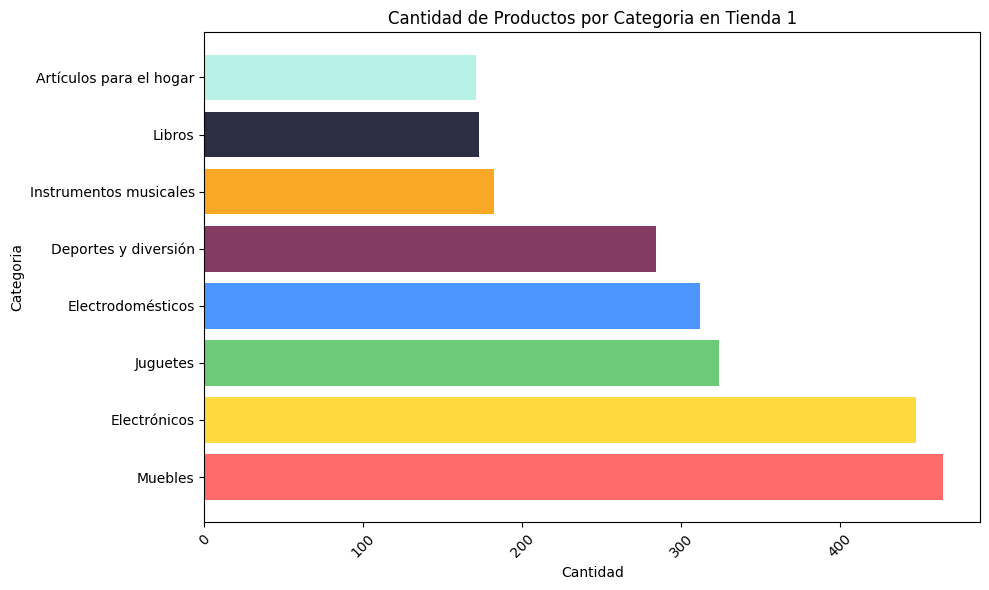

,Categoria,Cantidad
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


In [4]:
def categoria_cantidad(tienda,i):
    print("*"*10)
    print(f"Tienda{i}")
    print("*"*10)
    try:
        cat_cant = tienda["Categoría del Producto"].value_counts().reset_index().rename(columns={'Categoría del Producto': 'Categoria', 'count': 'Cantidad'})
        plt.figure(figsize=(10, 6))
        plt.barh(cat_cant['Categoria'], cat_cant['Cantidad'], color=["#FF6B6B","#FFD93D","#6BCB77","#4D96FF", "#843B62","#F9A826","#2C2E43","#B8F2E6", "#F67280","#355C7D" ])
        plt.title(f'Cantidad de Productos por Categoria en Tienda {i}')
        plt.ylabel('Categoria')
        plt.xlabel('Cantidad')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("No se ha podido calcular la cantidad de productos por categoria",e)
        
    return cat_cant

categoria_cantidad(tienda1,1)

**********
Tienda2
**********


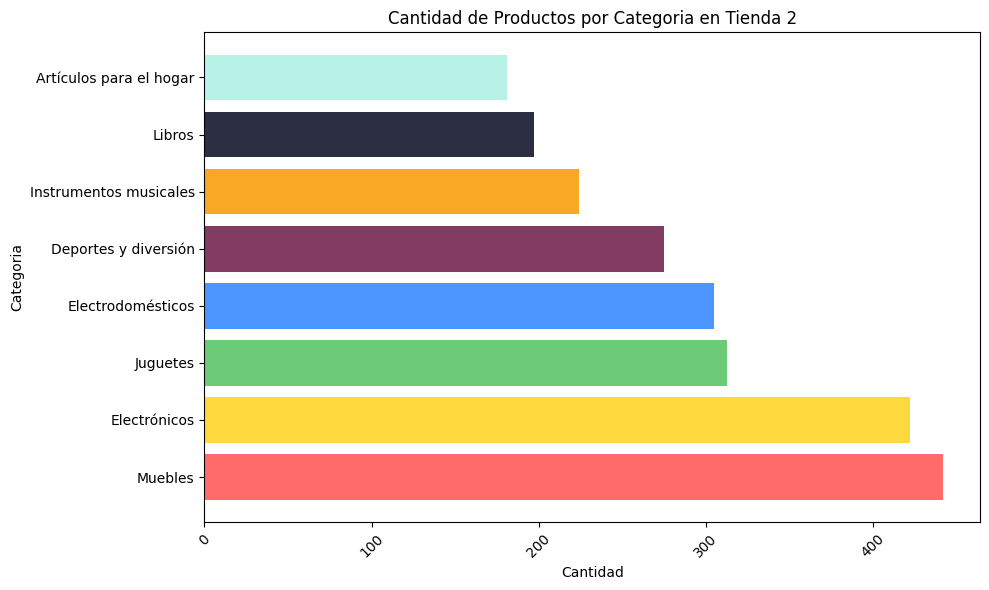

,Categoria,Cantidad
0,Muebles,442
1,Electrónicos,422
2,Juguetes,313
3,Electrodomésticos,305
4,Deportes y diversión,275
5,Instrumentos musicales,224
6,Libros,197
7,Artículos para el hogar,181


In [5]:
categoria_cantidad(tienda2,2)

**********
Tienda3
**********


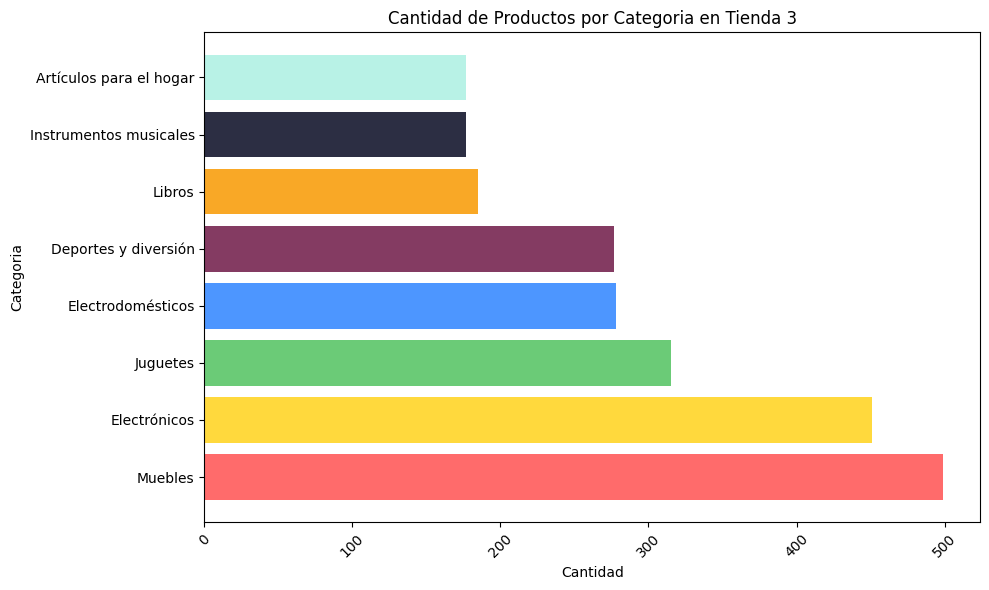

,Categoria,Cantidad
0,Muebles,499
1,Electrónicos,451
2,Juguetes,315
3,Electrodomésticos,278
4,Deportes y diversión,277
5,Libros,185
6,Instrumentos musicales,177
7,Artículos para el hogar,177


In [6]:
categoria_cantidad(tienda3,3)

**********
Tienda4
**********


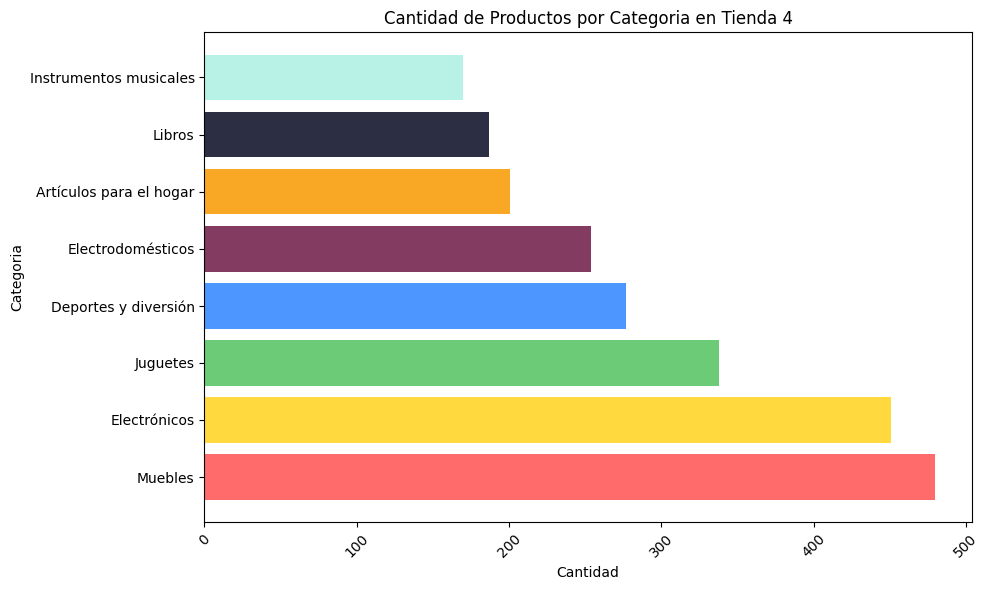

,Categoria,Cantidad
0,Muebles,480
1,Electrónicos,451
2,Juguetes,338
3,Deportes y diversión,277
4,Electrodomésticos,254
5,Artículos para el hogar,201
6,Libros,187
7,Instrumentos musicales,170


In [7]:
categoria_cantidad(tienda4,4)

# 3. Calificación promedio de la tienda


- Calcularemos el promedio de la columna `Calificacion`

La calificacion de tienda1 es de 3.98
La calificacion de tienda2 es de 4.04
La calificacion de tienda3 es de 4.05
La calificacion de tienda4 es de 4.0


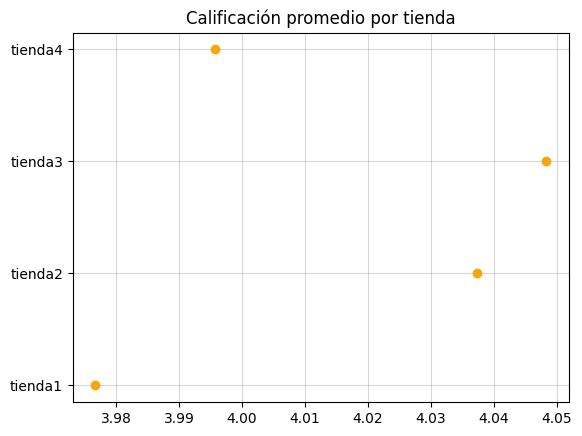

In [8]:
calificacion = []
for i,tienda in enumerate(tiendas):
    total = tienda['Calificación'].mean()
    calificacion.append(total)
    print(f'La calificacion de tienda{i+1} es de {round(total,2)}')

fig, ax = plt.subplots()
plt.scatter(calificacion, tiendas_string, color='orange')
plt.grid(alpha=0.5)
plt.title(f'Calificación promedio por tienda')
plt.show()

# 4. Productos más y menos vendidos

- Analisis de los productos que presentan mayor y menor cantidad de ventas por tienda 

In [9]:
def product_sales(tienda,i):
    print("-"*100)
    print("*"*10)
    print(f"Tienda{i+1}")
    print("*"*10,"\n")
    
    df =  tienda['Producto'].value_counts(ascending=False).reset_index()
    max = df["count"].to_list()[0]
    min = df["count"].to_list()[-1]
    products_max = ', '.join(df[df['count'] == max]['Producto'].to_list())
    products_min = ', '.join(df[df['count'] == min]['Producto'].to_list())
    print(f"Los productos mas vendidos de tienda {i} son {products_max} con un total de {max} ventas")
    print(f"Los productos menos vendidos de tienda {i} son {products_min} con un total de {min} ventas \n \n")
    print("-"*100)
    fig, ax = plt.subplots(figsize=(6, 8))

    ax.pie( [max,min] ,labels=[products_max,products_min], autopct=lambda p: f'{int(p * sum([max,min]) / 100)}')
    ax.set_title(f'Productos mas vendidos de Tienda {i}')
    plt.title(f'Productos mas vendidos de Tienda {i}')
    
    plt.tight_layout()
    plt.show()

----------------------------------------------------------------------------------------------------
**********
Tienda2
********** 

Los productos mas vendidos de tienda 1 son Microondas, TV LED UHD 4K, Armario con un total de 60 ventas
Los productos menos vendidos de tienda 1 son Auriculares con micrófono, Celular ABXY con un total de 33 ventas 
 

----------------------------------------------------------------------------------------------------


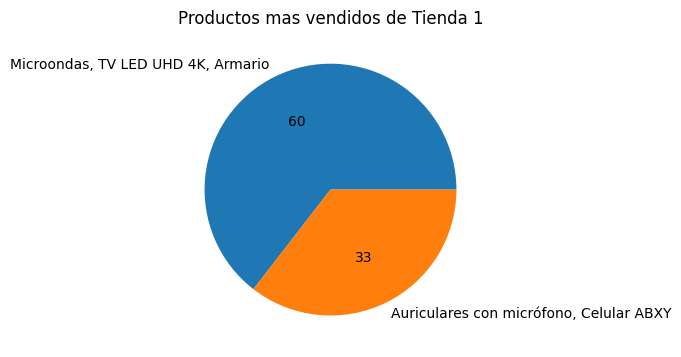

In [10]:
# Tienda 1

product_sales(tienda1,1)

----------------------------------------------------------------------------------------------------
**********
Tienda3
********** 

Los productos mas vendidos de tienda 2 son Iniciando en programación con un total de 65 ventas
Los productos menos vendidos de tienda 2 son Juego de mesa con un total de 32 ventas 
 

----------------------------------------------------------------------------------------------------


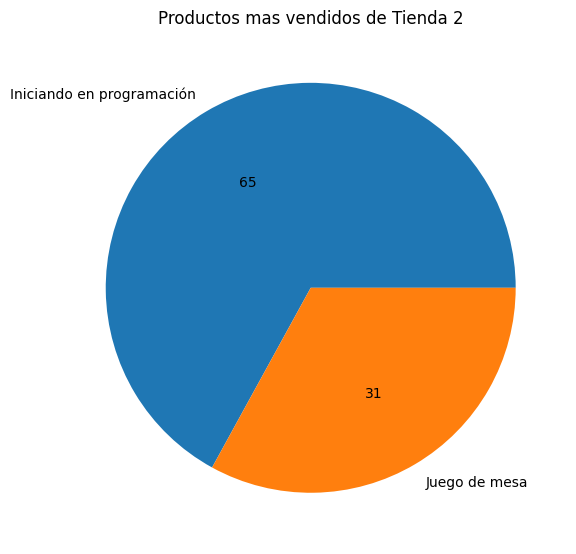

In [11]:
# Tienda 2

product_sales(tienda2,2)

----------------------------------------------------------------------------------------------------
**********
Tienda4
********** 

Los productos mas vendidos de tienda 3 son Kit de bancas con un total de 57 ventas
Los productos menos vendidos de tienda 3 son Bloques de construcción con un total de 35 ventas 
 

----------------------------------------------------------------------------------------------------


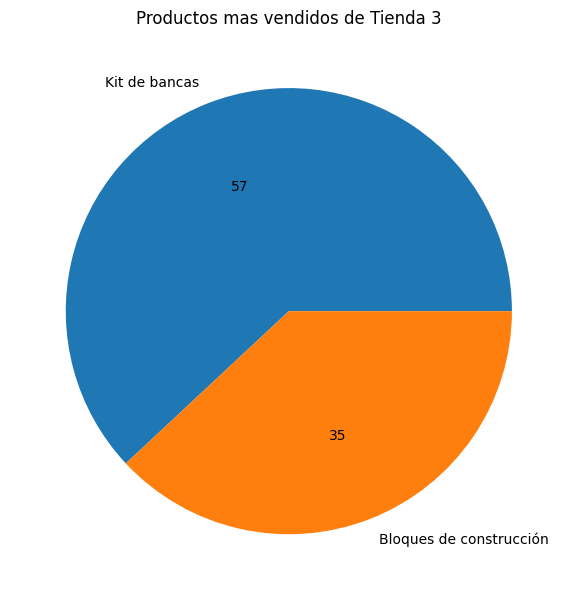

In [12]:
# Tienda 3

product_sales(tienda3,3)

----------------------------------------------------------------------------------------------------
**********
Tienda5
********** 

Los productos mas vendidos de tienda 4 son Cama box con un total de 62 ventas
Los productos menos vendidos de tienda 4 son Guitarra eléctrica con un total de 33 ventas 
 

----------------------------------------------------------------------------------------------------


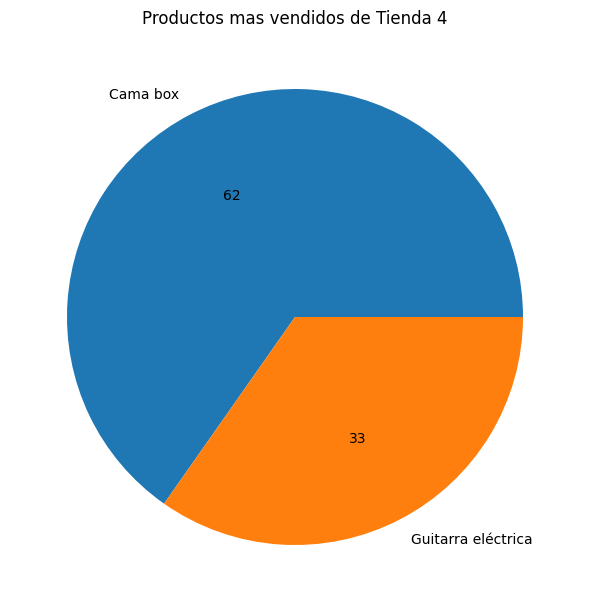

In [13]:
# Tienda 4

product_sales(tienda4,4)

# 5. Envío promedio por tienda

- Calculo de cuanto se gasta, en promedio, una tienda en enviar sus productos

**********
Tienda1
**********
El costo de envío de tienda1 es de 26018.61
----------------------------------------------------------------------------------------------------
**********
Tienda2
**********
El costo de envío de tienda2 es de 25216.24
----------------------------------------------------------------------------------------------------
**********
Tienda3
**********
El costo de envío de tienda3 es de 24805.68
----------------------------------------------------------------------------------------------------
**********
Tienda4
**********
El costo de envío de tienda4 es de 23459.46
----------------------------------------------------------------------------------------------------


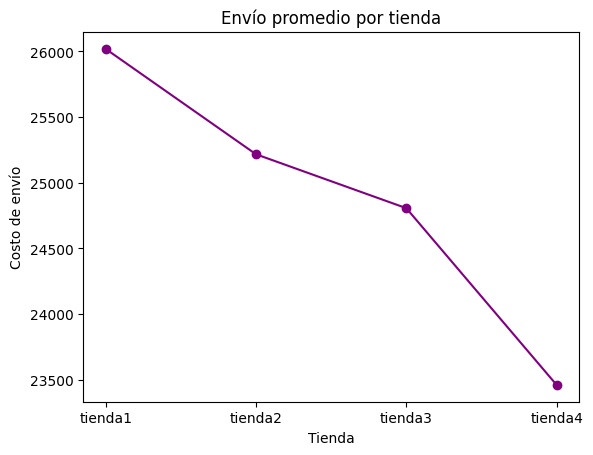

In [17]:
prom_envio = []
for i,tienda in enumerate(tiendas):
    print("*"*10)
    print(F"Tienda{i+1}")
    print("*"*10)
    total = round(tienda['Costo de envío'].mean(),2)
    prom_envio.append(total)
    print(f'El costo de envío de tienda{i+1} es de {total}')
    print("-"*100)

fig, ax = plt.subplots()
plt.title("Envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo de envío")
ax.plot(tiendas_string, prom_envio, marker='o', color='purple')
plt.show()


## ***Analisis***

En esta ocasión, se asesorará al dueño de diversas tiendas acerca de cual de las mismas, debe ser vendida. Dentro de los aspectos a analizar, se tuvo en cuenta su **facturación, calificación, costo de envóo, venta por categoría y que productos fueron lo más y menos vendidos**.

`TIENDA 1:` Esta tienda posee la **mayor** `facturación` dentro de las cuatro tiendas, sin embargo, es la que **peor** calificación posee. Ademas es la que **mayor** `costo de envío promedio` presenta <br> <br>
`TIENDA 2 Y 3:` Ambas tiendas se encuentran en el medio de los valores. No poseen <u> ni la `facturación` más alta ni más baja y tampoco poseen el costo de envio promedio más bajo ni más alto</u>. Además, son las dos con mejor calificación. Sería un error venderlas ya que tienen un gran potencial a futuro. <br> <br>
`TIENDA 4:`  Esta tienda posee la menor facturacion dentro de las cuatro tiendas, y es la segunda con peor calificacion. Sin emabrgo, es la que menor costo de envio promedio presenta <br>

### Conclusión

- Si bién es importante que una tienda produzca gran cantidad de dinero, habrías que evaluar que tan probable es mantener tal estructura con el pasar de los tiempos si tenemos indicadores bajos como lo puede ser la calificación. 
- A su vez, tenemos que tener en cuenta los egresos. De nada sirve una gran ingesta de dinero si luego tendremos que deshacernos del mismo
- En resumidas cuentas, las tiendas 1 y 4, se llevan las miradas cuando de venderlas se trata. Pero como no todo lo que brilla es oro, se recomendaria vender la tienda numero 1 (uno) para evitar posible perdida de capital en un futuro